Classification of the bacteria data using the XGBoost classifier.

The data is each replicate of each species along the rows, and the fluorescense spectra readings along the columns. 

In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
os.getcwd()

'/home/anthony/bacteria-project/other_experiments'

In [3]:
os.listdir('../data')

['Classific.py',
 'graphs.pdf',
 'growth_stages.csv',
 '16ms_32ms_growth_phase_spectra.csv',
 'bacteria_32ms.csv',
 'PC6allwavelengths.png',
 'bacteria_16ms.csv',
 'wavelengths.csv',
 '16_ms_lag_codes.csv',
 'bacteria.csv']

In [4]:
df = pd.read_csv('../data/bacteria_16ms.csv', header=[0, 1, 2, 3], index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1042
Columns: 135 entries, (lag, positive, bc, 01) to (stat, negative, se, 07)
dtypes: float64(135)
memory usage: 1.1 MB


# Preprocessing

In [5]:
lag = df['lag'].T
lag = lag.add_prefix('lag_')

log = df['log'].T
log = log.add_prefix('log_')

stat = df['stat'].T
stat = stat.add_prefix('stat_')

df_concat = pd.concat([lag, log, stat], axis=1)
df_concat

lag_0     lag_1     lag_2      lag_3     lag_4  \
gramness species replicate                                                      
negative ec      01        -0.849660  0.849660  2.352898  -0.457530  0.065363   
                 02         0.786579 -1.114310  0.721023   1.638780  1.507702   
                 03        -0.129750  0.648743 -0.713620  -1.427320  0.908299   
                 04        -0.642560 -1.986080  0.116830   1.343595  1.518857   
                 05        -0.597650  0.179290  0.657402   0.717218  1.793046   
                 06        -1.056270  0.248530 -0.186400  -2.733990  0.124277   
                 07         3.554267  1.881335 -0.557560 -13.423800 -3.356780   
                 08         0.188377 -1.318620  0.062791  -1.193100  0.753540   
                 09              NaN       NaN       NaN        NaN       NaN   
         pa      01        -0.250260 -0.062570  1.376439  -0.813400 -0.500560   
                 02        -1.198300  1.654795 -1.940110   1.312503 -0.970120   
                 03        -0.124480  0.373440  1.431539   1.929570  2.614285   
                 04        -0.397470  0.066244  0.463717   1.126222  0.927487   
                 05        -0.322480  0.515967 -0.193490  -1.354500 -0.387000   
                 06        -1.641770  0.117268 -0.234540   0.645014 -0.293190   
                 07              NaN       NaN       NaN        NaN       NaN   
                 08              NaN       NaN       NaN        NaN       NaN   
         se      01         0.128596  1.157322  0.964434  -0.064300  0.192902   
                 02         0.328784 -0.131510 -0.460300  -1.052160 -0.526080   
                 03         1.344575 -1.216520  0.256110   0.640305  0.384181   
                 04         2.090057 -0.809050 -1.415850   0.471977  0.471977   
                 05        -1.547500 -1.190380  0.238074   0.833313 -1.547610   
                 06              NaN       NaN       NaN        NaN       NaN   
                 07              NaN       NaN       NaN        NaN       NaN   
positive bc      01         0.000000  1.560060  0.715025  -0.520060  0.130014   
                 02         0.622353 -2.115990  0.062234   2.178335  1.867163   
                 03         0.064528  0.645279 -1.032450  -2.064991 -1.419711   
                 04        -1.094650 -2.554170 -0.912210   0.851433  3.709871   
                 05        -1.492810 -0.559800  2.923387   3.047967  2.985793   
                 06        -0.979760 -0.061230  0.489875  -1.530940  0.000003   
                 07        -0.240070  0.600163  0.540146  -1.200400  1.260425   
                 08         0.060945 -0.792280  0.182837   0.853271 -3.047420   
                 09         0.247423  0.123709 -0.742270   1.360885  2.226921   
                 10         2.628512  0.292028 -0.408840  -5.741500  4.453517   
                 11         0.637664  1.785430  0.191293  -0.127530 -0.956540   
                 12         0.192628 -0.192630  0.577884  -0.192640 -0.321060   
         lm      01        -3.504790  4.778309  6.435558   1.725630  0.191804   
                 02         0.177790 -0.533370 -0.474100  -1.778000 -0.177810   
                 03         0.519307 -0.259650 -0.259650   2.077325  1.038670   
                 04        -0.776180  0.776173  0.323411  -0.776220  1.293722   
                 05        -0.061520  1.107426 -0.123050   0.184587 -0.861390   
         sa      01         0.141226 -0.494290  2.118387  -0.494320  0.776791   
                 02        -0.922270  0.368908 -1.106730   1.106783  0.799366   
                 03        -0.375890 -0.438540  0.187944   3.007268  1.691599   
                 04        -0.303680 -0.364410 -1.275440   1.579194  0.121470   
                 05        -1.180120  0.413041  0.413041   0.767116  1.416233   
                 06         0.933263 -0.933260 -1.399900  -0.583320  0.349998   
                 07         1.115037 -0.065600 -1.246210  -0.4

In [6]:
df_concat = df_concat.dropna(axis=0)
df_concat

lag_0     lag_1     lag_2     lag_3     lag_4  \
gramness species replicate                                                     
negative ec      01        -0.849660  0.849660  2.352898 -0.457530  0.065363   
                 02         0.786579 -1.114310  0.721023  1.638780  1.507702   
                 03        -0.129750  0.648743 -0.713620 -1.427320  0.908299   
                 04        -0.642560 -1.986080  0.116830  1.343595  1.518857   
                 05        -0.597650  0.179290  0.657402  0.717218  1.793046   
         pa      01        -0.250260 -0.062570  1.376439 -0.813400 -0.500560   
                 02        -1.198300  1.654795 -1.940110  1.312503 -0.970120   
                 03        -0.124480  0.373440  1.431539  1.929570  2.614285   
                 04        -0.397470  0.066244  0.463717  1.126222  0.927487   
                 05        -0.322480  0.515967 -0.193490 -1.354500 -0.387000   
                 06        -1.641770  0.117268 -0.234540  0.645014 -0.293190   
         se      01         0.128596  1.157322  0.964434 -0.064300  0.192902   
                 02         0.328784 -0.131510 -0.460300 -1.052160 -0.526080   
                 03         1.344575 -1.216520  0.256110  0.640305  0.384181   
                 04         2.090057 -0.809050 -1.415850  0.471977  0.471977   
                 05        -1.547500 -1.190380  0.238074  0.833313 -1.547610   
positive bc      01         0.000000  1.560060  0.715025 -0.520060  0.130014   
                 02         0.622353 -2.115990  0.062234  2.178335  1.867163   
                 03         0.064528  0.645279 -1.032450 -2.064991 -1.419711   
                 04        -1.094650 -2.554170 -0.912210  0.851433  3.709871   
                 05        -1.492810 -0.559800  2.923387  3.047967  2.985793   
                 06        -0.979760 -0.061230  0.489875 -1.530940  0.000003   
                 07        -0.240070  0.600163  0.540146 -1.200400  1.260425   
                 08         0.060945 -0.792280  0.182837  0.853271 -3.047420   
                 09         0.247423  0.123709 -0.742270  1.360885  2.226921   
                 10         2.628512  0.292028 -0.408840 -5.741500  4.453517   
                 11         0.637664  1.785430  0.191293 -0.127530 -0.956540   
                 12         0.192628 -0.192630  0.577884 -0.192640 -0.321060   
         lm      01        -3.504790  4.778309  6.435558  1.725630  0.191804   
                 02         0.177790 -0.533370 -0.474100 -1.778000 -0.177810   
                 03         0.519307 -0.259650 -0.259650  2.077325  1.038670   
         sa      01         0.141226 -0.494290  2.118387 -0.494320  0.776791   
                 02        -0.922270  0.368908 -1.106730  1.106783  0.799366   
                 03        -0.375890 -0.438540  0.187944  3.007268  1.691599   
                 04        -0.303680 -0.364410 -1.275440  1.579194  0.121470   
                 05        -1.180120  0.413041  0.413041  0.767116  1.416233   
                 06         0.933263 -0.933260 -1.399900 -0.583320  0.349998   
                 07         1.115037 -0.065600 -1.246210 -0.459150 -0.787120   
                 08         0.186163 -1.116970  0.682596  1.737603  0.372347   

                                lag_5         lag_6     lag_7     lag_8  \
gramness species replicate                                                
negative ec      01          1.241889  1.241891e+00 -0.196090  0.784355   
                 02          0.262210  5.244150e-01 -0.983280 -2.359880   
                 03          0.778547 -7.136600e-01  0.648786  3.633199   
                 04          1.051515  1.752525e+00 -0.525770 -1.986210   
                 05         -0.239070  7.172160e-01 -2.211430 -0.119540   
         pa      01         -3.128480 -1.564230e+00 -2.753060  1.939672   
                 02          0.913050 -5.135900e-01 -0.741840 -1.084260   
                 03          1.182648  2.676536e+00  2.614290 -0.684700   


In [7]:
X = df_concat.values
X = (X - X.min()) / (X.max() - X.min())

print(X.min(), X.mean(), X.max())

0.0 0.04540645445549405 1.0


In [8]:
y = df_concat.reset_index()['species']
y.head()

0    ec
1    ec
2    ec
3    ec
4    ec
Name: species, dtype: object

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Label'),
 Text(0.5, 1.0, 'Distribution of Labels')]

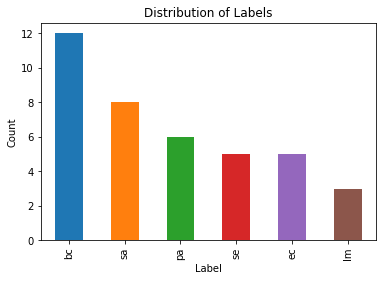

In [9]:
%matplotlib inline

ax = y.value_counts().plot(kind='bar')
ax.set(xlabel='Label',
      ylabel='Count',
      title='Distribution of Labels')

In [10]:
y.describe()

count     39
unique     6
top       bc
freq      12
Name: species, dtype: object

In [11]:
print(y)

0     ec
1     ec
2     ec
3     ec
4     ec
5     pa
6     pa
7     pa
8     pa
9     pa
10    pa
11    se
12    se
13    se
14    se
15    se
16    bc
17    bc
18    bc
19    bc
20    bc
21    bc
22    bc
23    bc
24    bc
25    bc
26    bc
27    bc
28    lm
29    lm
30    lm
31    sa
32    sa
33    sa
34    sa
35    sa
36    sa
37    sa
38    sa
Name: species, dtype: object


In [12]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

print(X[:5])
print(y[:5])

[[0.00196262 0.0019602  0.00198433 ... 0.00197709 0.00199652 0.00204993]
 [0.00201303 0.00194115 0.00192318 ... 0.0021681  0.00191907 0.00174485]
 [0.00195408 0.001984   0.00200241 ... 0.00202237 0.00197143 0.00198275]
 [0.00202887 0.00193024 0.00198695 ... 0.00197195 0.00197195 0.00205426]
 [0.00199709 0.00196709 0.00196709 ... 0.00201126 0.00201126 0.00198441]]
33    sa
36    sa
4     ec
13    se
30    lm
Name: species, dtype: object


# PCA + XGBoost

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, svd_solver='full')
pca.fit(X)

X_pca = pca.transform(X)
print(X_pca.shape)

(39, 3)


In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, cross_val_score, GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [2 ** n for n in range(4)],
    'n_estimators': [64, 128, 256, 512],
    'learning_rate': [10 ** n for n in range(-4, 0)],
    'booster': ['gbtree', 'gblinear', 'dart']
}

clf = XGBClassifier(n_jobs=-1, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=20, random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=cv, verbose=10, n_jobs=4)
grid_search.fit(X_pca, y)

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 60 folds for each of 192 candidates, totalling 11520 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1748s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0651s.) Setting batch_size=12.
[Parallel(n_jobs=4)]: Done  39 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 127 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Batch computation too slow (2.0579s.) Setting batch_size=6.
[Parallel(n_jobs=4)]: Done 259 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 355 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done 433 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Batch computation too slow (2.1250s.) Setting batch_size=3.
[Parallel(n_jobs=4)]: Done 499 tasks      | ela

[Parallel(n_jobs=4)]: Batch computation too slow (10.7125s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Batch computation too slow (7.1126s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Batch computation too slow (2.0255s.) Setting batch_size=1.
[Parallel(n_jobs=4)]: Done 10793 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Batch computation too fast (0.1944s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Batch computation too fast (0.1117s.) Setting batch_size=6.
[Parallel(n_jobs=4)]: Batch computation too slow (2.4329s.) Setting batch_size=3.
[Parallel(n_jobs=4)]: Batch computation too slow (4.8577s.) Setting batch_size=1.
[Parallel(n_jobs=4)]: Batch computation too fast (0.1959s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done 11052 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Batch computation too fast (0.1160s.) Setting batch_size=6.
[Parallel(n_jobs=4)]: Batch computation too slow (2.2308s.) Setting batch_size=3.
[Parallel(n_jobs=4)]: Batch computation too slow (5.1

0.49743589743589745
{'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 128}


[Parallel(n_jobs=4)]: Done 11520 out of 11520 | elapsed:  6.3min finished
/home/anthony/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
%%time

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=20, random_state=42)
scores = cross_val_score(grid_search.best_estimator_, X_pca, y, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.50 (+/- 0.22)
CPU times: user 6.87 s, sys: 14.5 ms, total: 6.88 s
Wall time: 1.82 s


In [16]:
%%time

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=20, random_state=42)
scores = cross_val_score(grid_search.best_estimator_, X, y, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.54 (+/- 0.30)
CPU times: user 2min 36s, sys: 192 ms, total: 2min 36s
Wall time: 40.2 s
